<a href="https://colab.research.google.com/github/Venchislav/Data-Science/blob/main/WalmartSalesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [680]:
import pandas as pd

In [681]:
df_train = pd.read_csv('/content/sample_data/train.csv')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [682]:
df_train.shape

(421570, 5)

In [683]:
df_train['Store'].nunique()

45

In [684]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [685]:
df_train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

# **plotting**

In [686]:
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.features import JointPlotVisualizer

In [687]:
import warnings
warnings.filterwarnings('ignore')

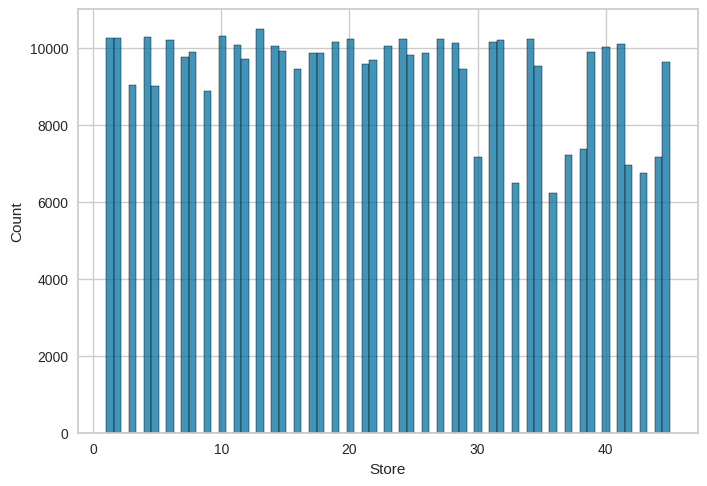

In [688]:
sns.histplot(df_train['Store']);

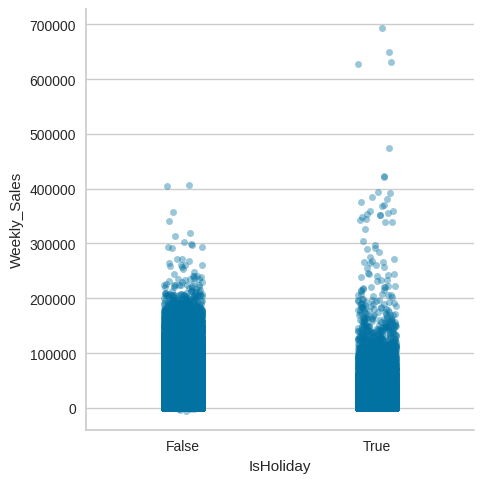

In [689]:
sns.catplot(data=df_train, x='IsHoliday', y='Weekly_Sales', alpha=0.4);

In [690]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

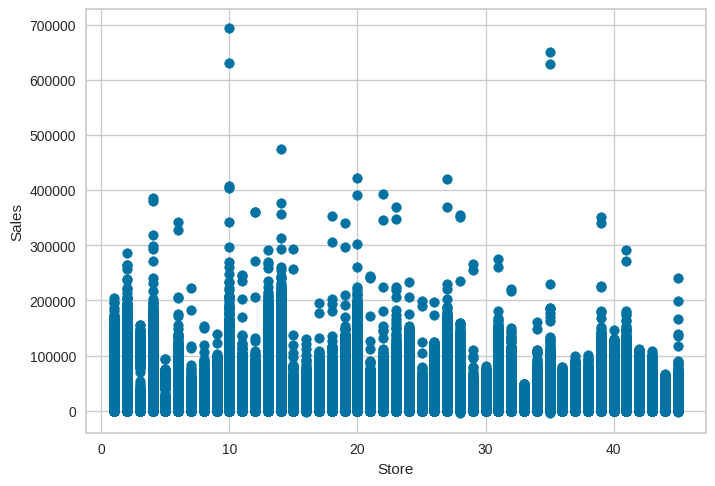

In [691]:
plt.scatter(df_train['Store'], df_train['Weekly_Sales']);
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show();

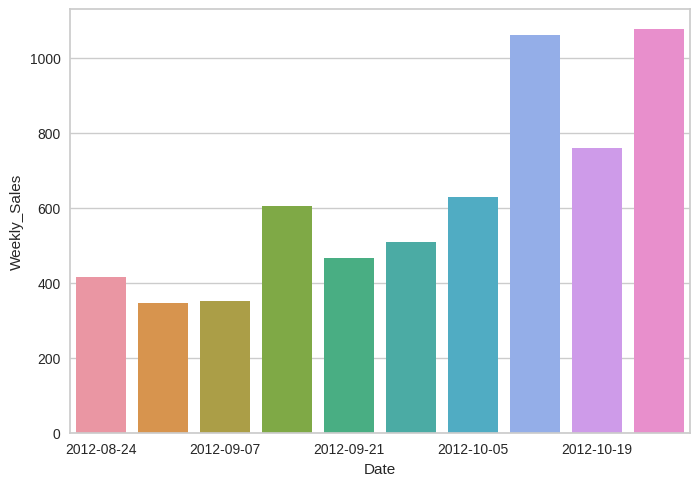

In [692]:
fig, ax = plt.subplots(1,1)
sns.barplot(df_train.tail(10), x='Date', y='Weekly_Sales');
ax.set_xticks(ax.get_xticks()[::2]);

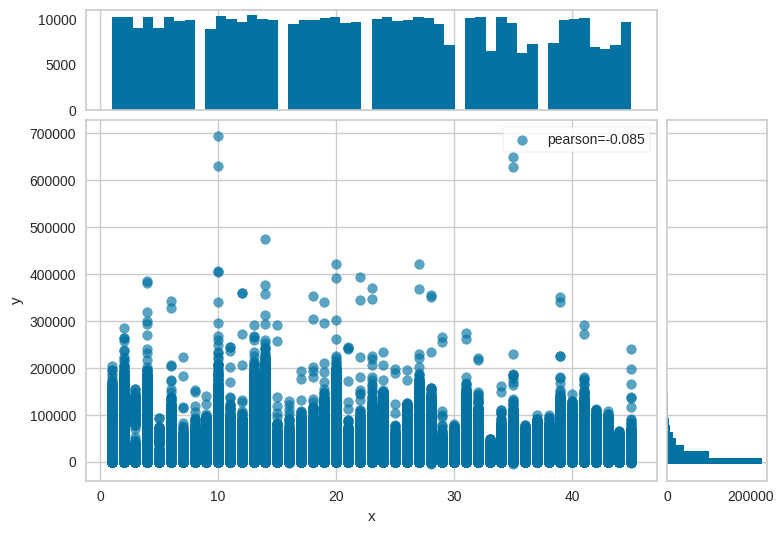

In [693]:
jpv = JointPlotVisualizer(feature='Store', target='Weekly_Sales')
jpv.fit(df_train['Store'], df_train['Weekly_Sales'])
jpv.poof();

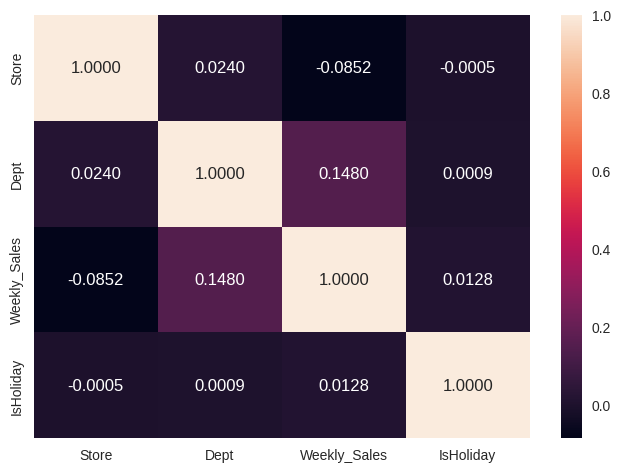

In [694]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, fmt='.4f');

# **PREPROCESSING**

In [695]:
df_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [696]:
import numpy as np

In [697]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [698]:
df_train.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [699]:
df_train['IsHoliday'] = df_train['IsHoliday'].apply(int)

In [700]:
# Additional data for prediction

In [701]:
features = pd.read_csv('/content/sample_data/features.csv')
stores = pd.read_csv('/content/sample_data/stores.csv')

In [702]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [703]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [704]:
features.shape

(8190, 12)

In [705]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [706]:
features['CPI'].fillna(features['CPI'].median(), inplace=True)
features['Unemployment'].fillna(features['Unemployment'].median(), inplace=True)

In [707]:
from pandas.core.ops import flex_arith_method_FRAME
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x<0 else x )
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [708]:
features.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [709]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [710]:
df_train = pd.merge(df_train, stores, on='Store', how='left')

In [711]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,0,A,151315
1,1,1,2010-02-12,46039.49,1,A,151315
2,1,1,2010-02-19,41595.55,0,A,151315
3,1,1,2010-02-26,19403.54,0,A,151315
4,1,1,2010-03-05,21827.90,0,A,151315


In [712]:
df_train['Type'].value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [713]:
df_train = pd.merge(df_train, features, on=['Store','Date'], how='left')
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [714]:
df_train.shape

(421570, 17)

In [715]:
df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')

In [716]:
df_train['Year'] = df_train['Date'].dt.year
df_train['Month'] = df_train['Date'].dt.month
df_train['Day'] = df_train['Date'].dt.day

In [717]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month,Day
0,1,1,2010-02-05,24924.50,0,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
1,1,1,2010-02-12,46039.49,1,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,12
2,1,1,2010-02-19,41595.55,0,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2,19
3,1,1,2010-02-26,19403.54,0,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2,26
4,1,1,2010-03-05,21827.90,0,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,3,5


In [718]:
df_train['Type'] = df_train['Type'].apply(lambda x: 0 if x == 'A' else 1 if x == 'B' else 2)

In [719]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month,Day
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
1,1,1,2010-02-12,46039.49,1,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,12
2,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2,19
3,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2,26
4,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,3,5


In [720]:
df_train['Type'].value_counts()

0    215478
1    163495
2     42597
Name: Type, dtype: int64

In [721]:
df_train['IsHoliday_y'] = df_train['IsHoliday_y'].apply(int)

In [722]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Year,Month,Day
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,2010,2,5
1,1,1,2010-02-12,46039.49,1,0,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,1,2010,2,12
2,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,2010,2,19
3,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,2010,2,26
4,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,2010,3,5


In [723]:
df_train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x              int64
Type                     int64
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y              int64
Year                     int64
Month                    int64
Day                      int64
dtype: object

In [724]:
agg_data = df_train.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.head()

,Store,Dept,max,min,mean,median,std
0,1,1,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,2,65615.36,35819.83,46102.090420,45561.85,3440.673222
2,1,3,51159.17,6165.73,13150.478042,10366.85,8708.978853
3,1,4,47893.23,32497.43,36964.154476,36579.96,2930.698313
4,1,5,85676.09,11570.27,24257.941119,21183.42,11330.286495


In [725]:
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [726]:
agg_data = agg_data.dropna()

In [727]:
df_train = pd.merge(df_train, agg_data, how='right')

In [728]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,IsHoliday_y,Year,Month,Day,max,min,mean,median,std
0,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,0.0,...,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,1,2010-02-12,46039.49,1,0,151315,38.51,2.548,0.0,...,8.106,1,2010,2,12,57592.12,14537.37,22513.322937,18535.48,9854.349032
2,1,1,2010-02-19,41595.55,0,0,151315,39.93,2.514,0.0,...,8.106,0,2010,2,19,57592.12,14537.37,22513.322937,18535.48,9854.349032
3,1,1,2010-02-26,19403.54,0,0,151315,46.63,2.561,0.0,...,8.106,0,2010,2,26,57592.12,14537.37,22513.322937,18535.48,9854.349032
4,1,1,2010-03-05,21827.90,0,0,151315,46.50,2.625,0.0,...,8.106,0,2010,3,5,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [729]:
df_train['Date'] = pd.to_datetime(df_train['Date'], errors='coerce')
df_train.sort_values(by=['Date'], inplace=True)
df_train.set_index(df_train.Date, inplace=True)
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,IsHoliday_y,Year,Month,Day,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,0,0,151315,42.31,2.572,0.0,...,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,29,21,2010-02-05,3680.21,0,1,93638,24.36,2.788,0.0,...,10.064,0,2010,2,5,8648.06,2559.03,3755.090210,3569.69,853.624337
2010-02-05,29,22,2010-02-05,8094.59,0,1,93638,24.36,2.788,0.0,...,10.064,0,2010,2,5,14975.46,4363.57,6408.913776,6096.53,1595.733197
2010-02-05,29,23,2010-02-05,16052.46,0,1,93638,24.36,2.788,0.0,...,10.064,0,2010,2,5,64076.13,10718.58,19722.253636,18091.83,7019.078616
2010-02-05,29,24,2010-02-05,3374.69,0,1,93638,24.36,2.788,0.0,...,10.064,0,2010,2,5,11014.71,1647.51,4440.371538,4051.14,1730.071684


In [730]:
df_train['Total_MarkDown'] = sum([df_train['MarkDown1'], df_train['MarkDown2'],
                            df_train['MarkDown3'], df_train['MarkDown4'],
                            df_train['MarkDown5']])

In [731]:
df_train.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1, inplace=True)

In [732]:
numeric_col = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_MarkDown']
data_numeric = df_train[numeric_col].copy()

In [733]:
from scipy import stats
import statsmodels.api as sm

In [734]:
df_train = df_train[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]

In [735]:
df_train = df_train[df_train['Weekly_Sales'] >= 0]

In [736]:
df_train.drop(columns='IsHoliday_x',inplace=True)
df_train.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374247 entries, 2010-02-05 to 2012-10-26
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           374247 non-null  int64         
 1   Dept            374247 non-null  int64         
 2   Date            374247 non-null  datetime64[ns]
 3   Weekly_Sales    374247 non-null  float64       
 4   Type            374247 non-null  int64         
 5   Size            374247 non-null  int64         
 6   Temperature     374247 non-null  float64       
 7   Fuel_Price      374247 non-null  float64       
 8   CPI             374247 non-null  float64       
 9   Unemployment    374247 non-null  float64       
 10  IsHoliday       374247 non-null  int64         
 11  Year            374247 non-null  int64         
 12  Month           374247 non-null  int64         
 13  Day             374247 non-null  int64         
 14  max             3742

In [737]:
cat_col = ['Store', 'Dept', 'Type']
data_cat = df_train[cat_col].copy()

In [738]:
data_cat = pd.get_dummies(data_cat, columns=cat_col)
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_0,Type_1,Type_2
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [739]:
df_train['IsHoliday'] = df_train['IsHoliday'].astype('int')

In [740]:
df_train = pd.concat([df_train, data_cat], axis=1)

In [741]:
df_train.drop(columns=cat_col, inplace=True)
df_train.drop(columns=['Date'], inplace=True)

In [742]:
from sklearn.preprocessing import MinMaxScaler

In [743]:
num_col = ['Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Total_MarkDown', 'max', 'min', 'mean', 'median', 'std']
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df, col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [744]:
df_train = normalization(df_train.copy(), num_col)

In [745]:
df_train.shape

(374247, 145)

In [755]:
df_train.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Day,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_0,Type_1,Type_2
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.050100,0.840500,0.508787,0,2010,2,5,...,0,0,0,0,0,0,0,1,0,0
2010-02-05,0.050583,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.111256,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.220634,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0
2010-02-05,0.046384,0.318073,0.120065,0.158317,0.054008,0.744463,0,2010,2,5,...,0,0,0,0,0,0,0,0,1,0


In [746]:
from sklearn.model_selection import train_test_split

In [747]:
X, y = df_train.drop('Weekly_Sales', axis=1), df_train['Weekly_Sales']

In [748]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# **MODEL**

In [749]:
from sklearn.linear_model import LinearRegression

In [750]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [751]:
y_pred = regressor.predict(X_test)

In [752]:
regressor.score(X_test, y_test)

0.925408865447958

In [753]:
from sklearn.ensemble import RandomForestRegressor

In [754]:
regressor1 = RandomForestRegressor()
regressor1.fit(X_train, y_train)


RandomForestRegressor()

In [756]:
y_pred1 = regressor1.predict(X_test)

In [757]:
regressor1.score(X_test, y_test)

0.9770195450001832

In [758]:
# Woah!

In [759]:
# Conclusion: Always try to make your data bigger and more detailed

# **HAVE A CREEPY HALLOWEEN!**

<img src='https://i.redd.it/anypkd017kv91.jpg' width=50%>